In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load and review data
data = pd.read_csv("vehicle.csv").dropna()
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# Five point summary
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [4]:
#checking for duplicates in the dataset
dupes = data.duplicated()
sum(dupes)

0

In [5]:
#checking for null values in the dataset
data.isnull().sum().sum()

0

In [6]:
data.shape

(813, 19)

In [7]:
# Finding missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

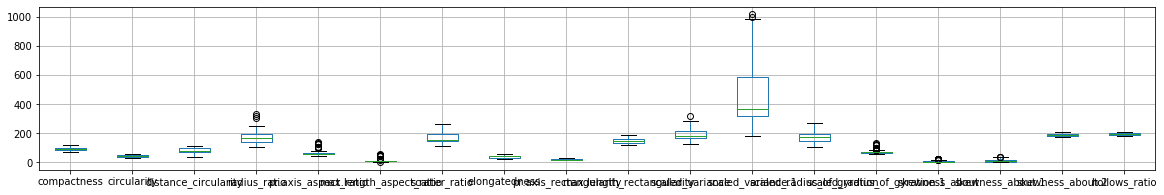

In [8]:
# Box plot for finding outliers in the dataset.
data.boxplot(figsize=(20,3))

In [9]:
# Filling outliers with upper quartile(Q3)
data["radius_ratio.0"]= np.where(data["radius_ratio"]>=195,195,data["radius_ratio"])
data["pr.axis_aspect_ratio.0"]=np.where(data["pr.axis_aspect_ratio"]>=65,65,data["pr.axis_aspect_ratio"])
data["max.length_aspect_ratio.0"]=np.where(data["max.length_aspect_ratio"]>=10,10,data["max.length_aspect_ratio"])
data["scaled_variance.0"]= np.where(data["scaled_variance"]>=217,217,data["scaled_variance"])
data["scaled_variance.11"]= np.where(data["scaled_variance.1"]>=586,586,data["scaled_variance.1"])
data["scaled_radius_of_gyration.11"]= np.where(data["scaled_radius_of_gyration.1"]>=75,75,data["scaled_radius_of_gyration.1"])
data["skewness_about.0"]= np.where(data["skewness_about"]>=9,9,data["skewness_about"])
data["skewness_about.11"]= np.where(data["skewness_about.1"]>=19,19,data["skewness_about.1"])
data

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  ...  \
0             42.0                    20.0                        159  ...   
1             45.0                    19.0                        143  ...   
2             32.0                    23.0                        158  ...   
3             46.0                    19.0                        143  ...   
4             45.0                    19.0                        144  ...   
..             ...                     ...                        ...  ...   
841           40.0                    20.0                        134  ...   
842           43.0                    20.0                        159  ...   
843           30.0                    25.0                        173  ...   
844           50.0                    18.0                        124  ...   
845           56.0                    17.0                        128  ...   

     hollows_ratio  class  radius_ratio.0  pr.axis_aspect_ratio.0  \
0              197    van           178.0                    65.0   
1              199    van           141.0                    57.0   
2              196    car           195.0                    65.0   
3              207    van           159.0                    63.0   
4              183    bus           195.0                    65.0   
..             ...    ...             ...                     ...   
841            195    car           183.0                    64.0   
842            197    van           163.0                    65.0   
843            201    car           195.0                    65.0   
844            195    car           146.0                    58.0   
845            190    van           123.0                    55.0   

     max.length_aspect_ratio.0  scaled_variance.0  scaled_variance.11  \
0                           10              176.0               379.0   
1                            9              170.0               330.0   
2                           10              217.0               586.0   
3                            9              160.0               309.0   
4                           10              217.0               325.0   
..                         ...                ...                 ...   
841                          8              200.0               422.0 

In [10]:
# Dropping radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1,skewness_about,skewness_about.1.
data = data.drop(['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1','skewness_about','skewness_about.1'], axis=1)
data

compactness  circularity  distance_circularity  scatter_ratio  \
0             95         48.0                  83.0          162.0   
1             91         41.0                  84.0          149.0   
2            104         50.0                 106.0          207.0   
3             93         41.0                  82.0          144.0   
4             85         44.0                  70.0          149.0   
..           ...          ...                   ...            ...   
841           93         39.0                  87.0          169.0   
842           89         46.0                  84.0          159.0   
843          106         54.0                 101.0          222.0   
844           86         36.0                  78.0          135.0   
845           85         36.0                  66.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_radius_of_gyration  skewness_about.2  hollows_ratio class  \
0                        184.0             187.0            197   van   
1                        158.0             189.0            199   van   
2                        220.0             188.0            196   car   
3                        127.0             199.0            207   van   
4                        188.0             180.0            183   bus   
..                         ...               ...            ...   ...   
841                      149.0             188.0            195   car   
842                      176.0             186.0            197   van   
843                      200.0             187.0            201   car   
844                      148.0             190.0            195   car   
845                      131.0             186.0            190   van   

     radius_ratio.0  pr.axis_aspect_ratio.0  max.length_aspect_ratio.0  \
0             178.0                    65.0                         10   
1             141.0                    57.0                          9   
2             195.0                    65.0                         10   
3             159.0                    63.0                          9   
4             195.0                    65.0                         10   
..              ...                     ...                        ...   
841           183.0                    64.0                          8   
842           163.0                    65.0                         10   
843           195.0                    65.0                         10   
844           146.0                    58.0                          7   
845           123.0                    55.0                          5   

     scaled_variance.0  scaled_variance.11  scaled_radius_of_gyration.11  \
0                176.0               379.0                          70.0   
1                170.0               330.0                          72.0   
2                217.0               586.0                          73.0   
3                160.0               309.0                          63.0   
4                217.0               325.0                          75.0   
..                 ...                 ...                       

In [11]:
pd.value_counts(data['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

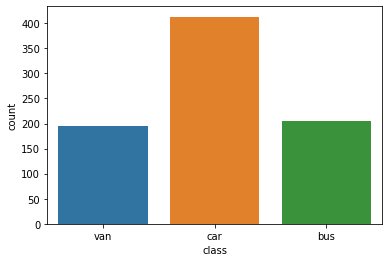

In [12]:
sns.countplot(data['class'])

In [13]:
mydata = data.drop('class', axis=1)

In [14]:
# Check for correlation of variable
mydata.corr(method='pearson')

compactness  circularity  distance_circularity  \
compactness                      1.000000     0.689885              0.789955   
circularity                      0.689885     1.000000              0.797704   
distance_circularity             0.789955     0.797704              1.000000   
scatter_ratio                    0.814026     0.858149              0.909023   
elongatedness                   -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity           0.814227     0.856137              0.897261   
max.length_rectangularity        0.674902     0.965366              0.773459   
scaled_radius_of_gyration        0.581405     0.935594              0.705689   
skewness_about.2                 0.296195    -0.113902              0.145258   
hollows_ratio                    0.372806     0.049331              0.343228   
radius_ratio.0                   0.721122     0.605257              0.793773   
pr.axis_aspect_ratio.0           0.193414     0.202494              0.282295   
max.length_aspect_ratio.0        0.458656     0.518148              0.648794   
scaled_variance.0                0.764219     0.800709              0.902523   
scaled_variance.11               0.811198     0.825337              0.922727   
scaled_radius_of_gyration.11    -0.216993     0.153400             -0.140385   
skewness_about.0                 0.175570     0.126665              0.076258   
skewness_about.11                0.147465    -0.000423              0.237872   

                              scatter_ratio  elongatedness  \
compactness                        0.814026      -0.788051   
circularity                        0.858149      -0.825108   
distance_circularity               0.909023      -0.912713   
scatter_ratio                      1.000000      -0.973413   
elongatedness                     -0.973413       1.000000   
pr.axis_rectangularity             0.991992      -0.950345   
max.length_rectangularity          0.808154      -0.771099   
scaled_radius_of_gyration          0.795748      -0.761563   
skewness_about.2                   0.009967      -0.117568   
hollows_ratio                      0.138424      -0.233408   
radius_ratio.0                     0.764241      -0.837699   
pr.axis_aspect_ratio.0             0.198317      -0.304552   
max.length_aspect_ratio.0          0.455828      -0.481531   
scaled_variance.0                  0.938177      -0.967595   
scaled_variance.11                 0.969721      -0.981307   
scaled_radius_of_gyration.11       0.042776       0.024070   
skewness_about.0                   0.054473      -0.034188   
skewness_about.11                  0.199928      -0.176384   

                              pr.axis_rectangularity  \
compactness                                 0.814227   
circularity                                 0.856137   
distance_circularity                        0.897261   
scatter_ratio                               0.991992   
elongatedness                              -0.950345   
pr.axis_rectangularity                      1.000000   
max.length_rectangularity                   0.811979   
scaled_radius_of_gyration                   0.792895   
skewness_about.2                           -0.017383   
hollows_ratio                               0.117202   
radius_ratio.0                              0.730914   
pr.axis_aspect_ratio.0                      0.163705   
max.length_aspect_ratio.0                   0.450697   
scaled_variance.0                           0.913850   
scaled_variance.11                          0.952094   
scaled_radius_of_gyration.11                0.056655   
skewness_about.0                            0.062071   
skewness_about.11                           0.201890   

                              max.length_rectangularity  \
compactness                                    0.674902   
circularity                                    0.965366   
distance_circularity                           0.773459   
scatter_ratio                

In [15]:
# Standardize the data with zscore.
from scipy.stats import zscore
mydata_z = mydata.apply(zscore)
mydata_z.head()

compactness  circularity  distance_circularity  scatter_ratio  \
0     0.163231     0.520408              0.060669      -0.198517   
1    -0.322874    -0.619123              0.124067      -0.591720   
2     1.256966     0.845988              1.518823       1.162569   
3    -0.079822    -0.619123             -0.002729      -0.742952   
4    -1.052030    -0.130753             -0.763506      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_radius_of_gyration  skewness_about.2  hollows_ratio  radius_ratio.0  \
0                   0.301676         -0.321809       0.171837        0.493399   
1                  -0.502972          0.003400       0.442318       -0.879836   
2                   1.415804         -0.159204       0.036596        1.124345   
3                  -1.462359          1.629444       1.524243       -0.211776   
4                   0.425468         -1.460039      -1.721531        1.124345   

   pr.axis_aspect_ratio.0  max.length_aspect_ratio.0  scaled_variance.0  \
0                1.055997                   1.143743          -0.350399   
1               -0.766775                   0.588601          -0.589756   
2                1.055997                   1.143743           1.285205   
3                0.600304                   0.588601          -0.988684   
4                1.055997                   1.143743           1.285205   

   scaled_variance.11  scaled_radius_of_gyration.11  skewness_about.0  \
0           -0.241250                     -0.150624          0.220401   
1           -0.622944                      0.333397          1.148827   
2            1.371213                      0.575407          1.148827   
3           -0.786527                     -1.844696          0.220401   
4           -0.661893                      1.059427          1.148827   

   skewness_about.11  
0           0.759710  
1           0.447847  
2          -0.331810  
3          -0.175878  
4          -0.019947

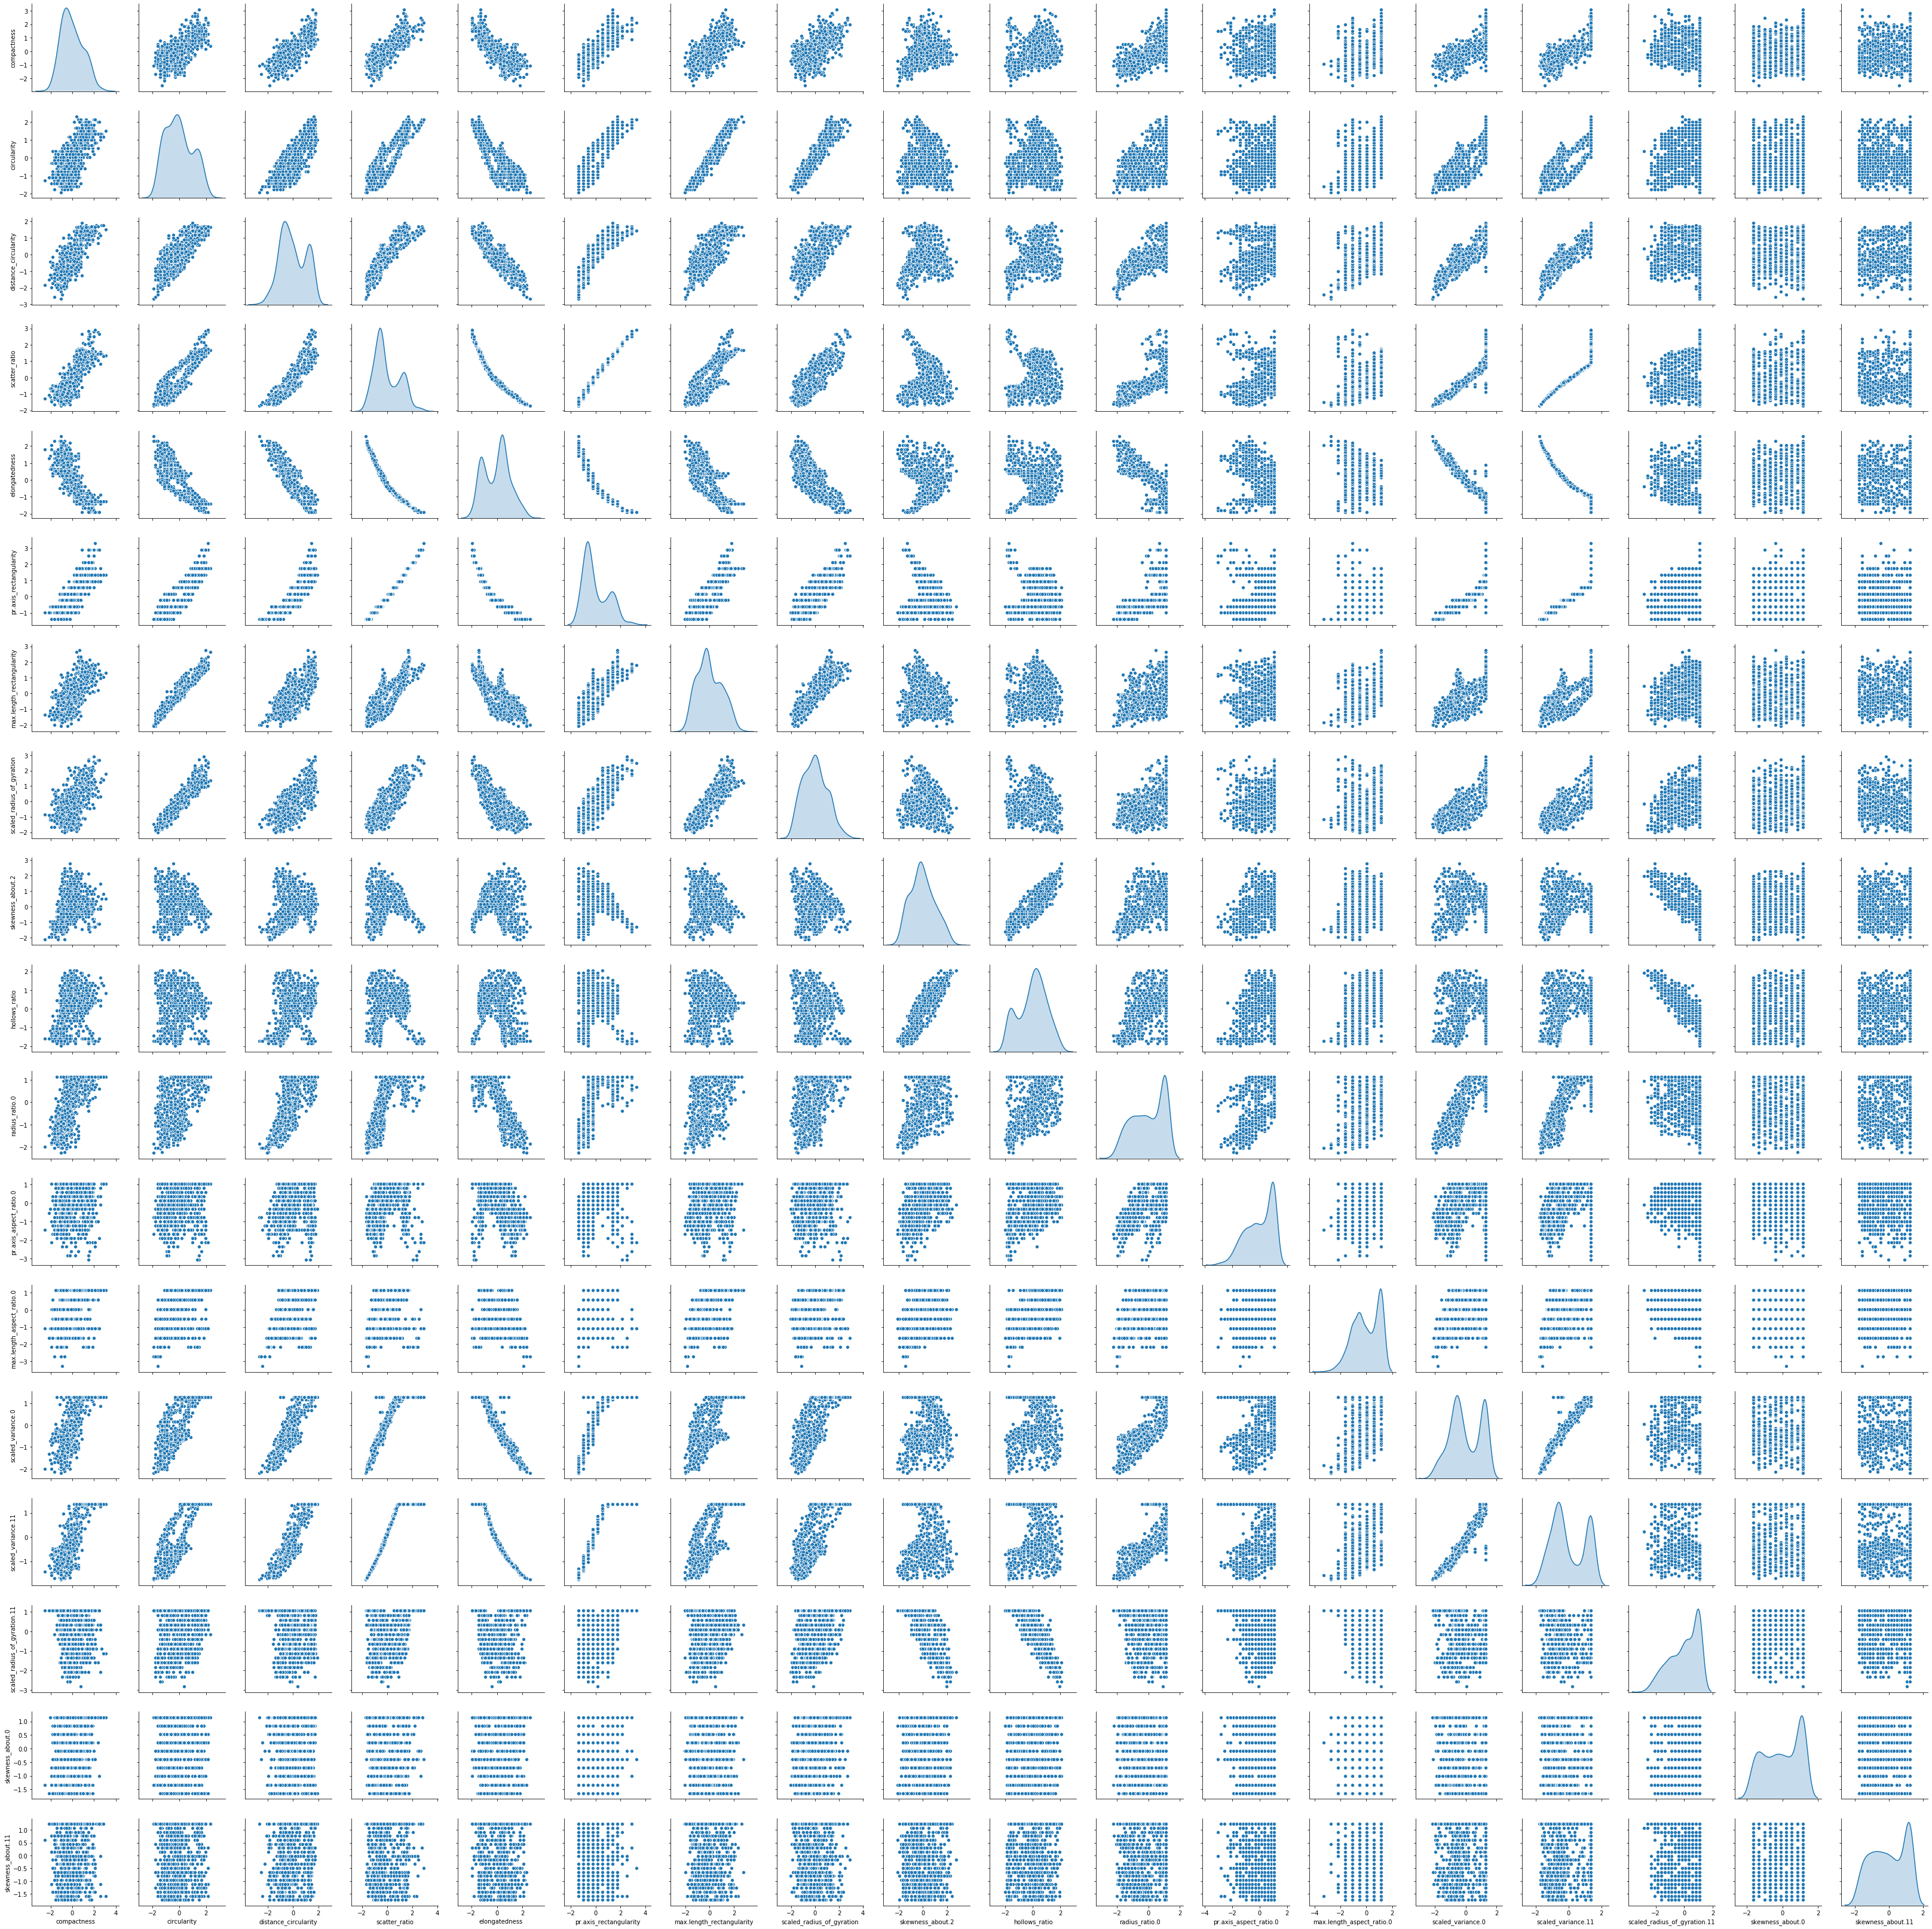

In [16]:
# Pairplot for dataset.
sns.pairplot(mydata_z, diag_kind='kde')

In [17]:
mydata.columns

Index(['compactness', 'circularity', 'distance_circularity', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_radius_of_gyration', 'skewness_about.2', 'hollows_ratio',
       'radius_ratio.0', 'pr.axis_aspect_ratio.0', 'max.length_aspect_ratio.0',
       'scaled_variance.0', 'scaled_variance.11',
       'scaled_radius_of_gyration.11', 'skewness_about.0',
       'skewness_about.11'],
      dtype='object')

In [18]:
# Split data
x = mydata[['circularity', 'distance_circularity', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_radius_of_gyration', 'skewness_about.2', 'hollows_ratio','radius_ratio.0', 'pr.axis_aspect_ratio.0',
       'max.length_aspect_ratio.0', 'scaled_variance.0', 'scaled_variance.11',
       'scaled_radius_of_gyration.11', 'skewness_about.0',
       'skewness_about.11']]
y = mydata['compactness']

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Transform the data i.e, scaling the data.
scalar = MinMaxScaler()
scalar.fit(x)
New_data = scalar.transform(x)
New_data

array([[0.57692308, 0.59722222, 0.32679739, ..., 0.6875    , 0.66666667,
        0.84210526],
       [0.30769231, 0.61111111, 0.24183007, ..., 0.8125    , 1.        ,
        0.73684211],
       [0.65384615, 0.91666667, 0.62091503, ..., 0.875     , 1.        ,
        0.47368421],
       ...,
       [0.80769231, 0.84722222, 0.71895425, ..., 0.6875    , 0.33333333,
        0.21052632],
       [0.11538462, 0.52777778, 0.1503268 , ..., 0.4375    , 0.        ,
        1.        ],
       [0.11538462, 0.36111111, 0.05228758, ..., 0.875     , 0.11111111,
        0.94736842]])

In [20]:
# Split x and y into training and test set in 70:30 ratio.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state= 1)
x_train.head()

circularity  distance_circularity  scatter_ratio  elongatedness  \
433         42.0                  70.0          150.0           45.0   
129         48.0                  95.0          199.0           32.0   
90          55.0                 107.0          218.0           31.0   
459         42.0                  90.0          178.0           37.0   
734         40.0                  55.0          132.0           53.0   

     pr.axis_rectangularity  max.length_rectangularity  \
433                    19.0                        145   
129                    23.0                        150   
90                     24.0                        173   
459                    21.0                        144   
734                    18.0                        139   

     scaled_radius_of_gyration  skewness_about.2  hollows_ratio  \
433                      172.0             181.0            185   
129                      200.0             192.0            194   
90                       229.0             188.0            199   
459                      138.0             199.0            208   
734                      158.0             176.0            183   

     radius_ratio.0  pr.axis_aspect_ratio.0  max.length_aspect_ratio.0  \
433           130.0                    56.0                          7   
129           195.0                    65.0                          7   
90            195.0                    65.0                         10   
459           192.0                    61.0                          9   
734           114.0                    53.0                          7   

     scaled_variance.0  scaled_variance.11  scaled_radius_of_gyration.11  \
433              177.0               328.0                          75.0   
129              216.0               586.0                          73.0   
90               217.0               586.0                          71.0   
459              189.0               480.0                          61.0   
734              142.0               249.0                          75.0   

     skewness_about.0  skewness_about.11  
433               9.0               14.0  
129               7.0               11.0  
90                3.0               10.0  
459               3.0                8.0  
734               0.0                7.0

In [21]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(x_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.07377049180327869

In [24]:
from sklearn.decomposition import PCA
covMatrix = np.cov(mydata_z, rowvar=False)
print(covMatrix)

[[ 1.00123153e+00  6.90734975e-01  7.90927455e-01  8.15028680e-01
  -7.89021266e-01  8.15229607e-01  6.75733223e-01  5.82121228e-01
   2.96560222e-01  3.73264696e-01  7.22009991e-01  1.93651961e-01
   4.59220761e-01  7.65160001e-01  8.12196650e-01 -2.17259809e-01
   1.75786655e-01  1.47646676e-01]
 [ 6.90734975e-01  1.00123153e+00  7.98686562e-01  8.59205477e-01
  -8.26124205e-01  8.57190895e-01  9.66555008e-01  9.36746689e-01
  -1.14042597e-01  4.93920345e-02  6.06002193e-01  2.02743008e-01
   5.18786263e-01  8.01694855e-01  8.26353111e-01  1.53588748e-01
   1.26820640e-01 -4.23045216e-04]
 [ 7.90927455e-01  7.98686562e-01  1.00123153e+00  9.10142415e-01
  -9.13836600e-01  8.98365758e-01  7.74411176e-01  7.06557870e-01
   1.45436991e-01  3.43650852e-01  7.94750164e-01  2.82642374e-01
   6.49593492e-01  9.03634190e-01  9.23863014e-01 -1.40557957e-01
   7.63523958e-02  2.38165148e-01]
 [ 8.15028680e-01  8.59205477e-01  9.10142415e-01  1.00123153e+00
  -9.74611691e-01  9.93214019e-01  8.

In [25]:
pca = PCA(n_components=18)
pca.fit(mydata_z)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# Eigen values
print(pca.explained_variance_)

[9.78027887e+00 3.32095511e+00 1.14056155e+00 1.10727018e+00
 8.53281618e-01 7.36019039e-01 3.55774236e-01 2.35309862e-01
 1.50835260e-01 9.40333109e-02 7.55705840e-02 5.44319941e-02
 3.55637166e-02 3.44231639e-02 1.70478799e-02 1.60550460e-02
 1.13380349e-02 3.41803309e-03]


In [27]:
# Eigen vectors
print(pca.components_)

[[-2.70642202e-01 -2.85213534e-01 -3.03681614e-01 -3.07965282e-01
   3.09642534e-01 -3.03760504e-01 -2.74078239e-01 -2.58340436e-01
  -4.66931388e-02 -9.82116311e-02 -2.71580698e-01 -1.10150915e-01
  -1.91803832e-01 -3.04834410e-01 -3.10450475e-01  2.54827182e-02
  -2.98313234e-02 -5.46508960e-02]
 [-7.61404527e-02  1.60599494e-01 -2.69702932e-02  8.34319161e-02
  -2.30127982e-02  9.73523675e-02  1.47546476e-01  2.26627250e-01
  -5.09709688e-01 -5.00353899e-01 -2.11097656e-01 -2.58324940e-01
  -9.45434690e-02  2.54207910e-02  2.18592333e-02  4.92107914e-01
  -3.86345052e-03 -6.23344664e-02]
 [-3.97297285e-02  1.86130759e-01 -9.73183549e-02 -1.06076739e-01
   6.82220452e-02 -1.13534069e-01  1.68212327e-01  2.18030972e-01
   6.10505221e-02  2.15673271e-02  3.76202181e-02  3.13061654e-01
   4.66430297e-02 -7.50874068e-02 -8.28837740e-02  1.44599640e-03
   2.57454859e-01 -8.15532296e-01]
 [-1.86616837e-01 -4.93576841e-02 -3.25532073e-02  9.77606634e-03
  -7.40947853e-02 -1.48629131e-02 -8.

In [28]:
# Percentage of variation explained by each vector.
print(pca.explained_variance_ratio_)

[5.42680500e-01 1.84270572e-01 6.32865911e-02 6.14393460e-02
 4.73462262e-02 4.08396515e-02 1.97409239e-02 1.30566904e-02
 8.36942951e-03 5.21764715e-03 4.19320174e-03 3.02028012e-03
 1.97333182e-03 1.91004572e-03 9.45939491e-04 8.90849892e-04
 6.29116057e-04 1.89657159e-04]


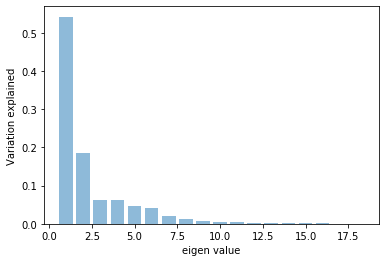

In [29]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen value')
plt.show()

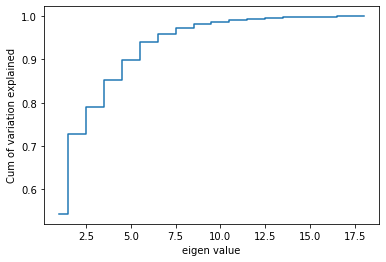

In [30]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_,), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen value')
plt.show()

In [31]:
# Dimensionality reduction to 7 variables.
pca7 = PCA(n_components=7)
pca7.fit(mydata_z)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(mydata_z)

[[-0.2706422  -0.28521353 -0.30368161 -0.30796528  0.30964253 -0.3037605
  -0.27407824 -0.25834044 -0.04669314 -0.09821163 -0.2715807  -0.11015091
  -0.19180383 -0.30483441 -0.31045048  0.02548272 -0.02983132 -0.0546509 ]
 [-0.07614045  0.16059949 -0.02697029  0.08343192 -0.0230128   0.09735237
   0.14754648  0.22662725 -0.50970969 -0.5003539  -0.21109766 -0.25832494
  -0.09454347  0.02542079  0.02185923  0.49210791 -0.00386345 -0.06233447]
 [-0.03972973  0.18613076 -0.09731835 -0.10607674  0.06822205 -0.11353407
   0.16821233  0.21803097  0.06105052  0.02156733  0.03762022  0.31306165
   0.04664303 -0.07508741 -0.08288377  0.001446    0.25745486 -0.8155323 ]
 [-0.18661684 -0.04935768 -0.03255321  0.00977607 -0.07409479 -0.01486291
  -0.08508637 -0.04420074 -0.06024294 -0.06479757  0.18898712  0.4348333
  -0.0834726   0.10789772  0.05314062  0.16248324 -0.80456578 -0.13745499]
 [ 0.07333762 -0.11089497 -0.10207099  0.1044543  -0.12609291  0.08638495
  -0.26775573  0.01881818  0.1397005

In [32]:
Xpca7

array([[-0.67351321, -0.33328046,  0.20353423, ..., -0.81458045,
        -1.59593719, -0.51212171],
       [ 1.46412238, -0.15395842, -0.32326472, ..., -0.63585691,
        -0.6038296 ,  0.40554252],
       [-4.05908004,  0.44551284,  0.85031221, ...,  0.41515876,
        -0.83608024,  0.88184997],
       ...,
       [-4.7727196 ,  0.11503423,  1.03928348, ..., -0.65609974,
         0.50911506,  0.27403853],
       [ 3.376471  , -1.16273326, -1.81532049, ..., -0.54856404,
         0.32428708, -0.36952408],
       [ 5.17874741,  0.64381865, -1.72049531, ..., -0.05391639,
         0.36374539, -0.71702462]])

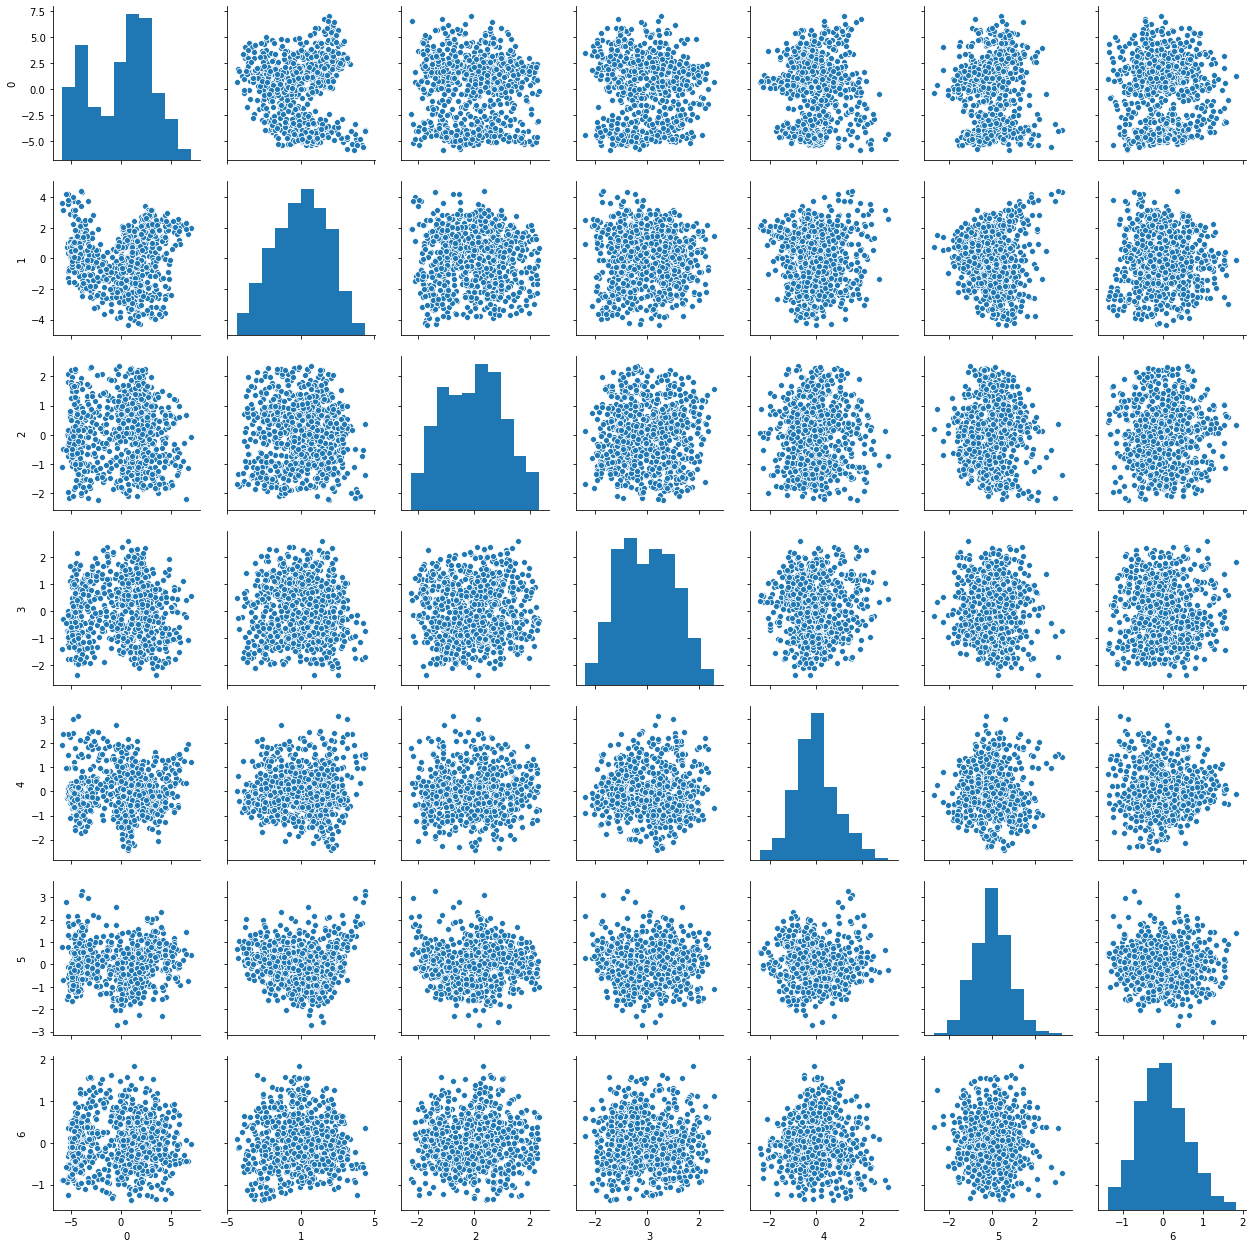

In [33]:
sns.pairplot(pd.DataFrame(Xpca7))

In [34]:
# Fit Linear model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(mydata_z, y)
regression_model.score(mydata_z, y)

1.0

In [35]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca7, y)
regression_model_pca.score(Xpca7, y)

0.830768664287225

In [36]:
# Fit support vector machine.
from sklearn.svm import SVC
model = SVC()
model.fit(mydata_z, y)
model.score(mydata_z, y)

0.27552275522755226

In [37]:
model_pca = SVC()
model_pca.fit(Xpca7, y)
model_pca.score(Xpca7, y)

C:\Users\Kranthi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.36654366543665434

In [38]:
# Dimensionality reduction to 3 variables
pca3 = PCA(n_components=3)
pca3.fit(mydata_z)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(mydata_z)

[[-0.2706422  -0.28521353 -0.30368161 -0.30796528  0.30964253 -0.3037605
  -0.27407824 -0.25834044 -0.04669314 -0.09821163 -0.2715807  -0.11015091
  -0.19180383 -0.30483441 -0.31045048  0.02548272 -0.02983132 -0.0546509 ]
 [-0.07614045  0.16059949 -0.02697029  0.08343192 -0.0230128   0.09735237
   0.14754648  0.22662725 -0.50970969 -0.5003539  -0.21109766 -0.25832494
  -0.09454347  0.02542079  0.02185923  0.49210791 -0.00386345 -0.06233447]
 [-0.03972973  0.18613075 -0.09731835 -0.10607674  0.06822203 -0.11353407
   0.16821233  0.21803098  0.06105054  0.02156731  0.0376202   0.31306166
   0.04664303 -0.07508741 -0.08288377  0.00144599  0.25745486 -0.8155323 ]]
[0.5426805  0.18427057 0.06328659]


In [39]:
Xpca3

array([[-0.67351321, -0.33328046,  0.20353423],
       [ 1.46412238, -0.15395842, -0.32326472],
       [-4.05908004,  0.44551284,  0.85031221],
       ...,
       [-4.7727196 ,  0.11503423,  1.03928347],
       [ 3.376471  , -1.16273326, -1.81532049],
       [ 5.17874741,  0.64381865, -1.72049531]])

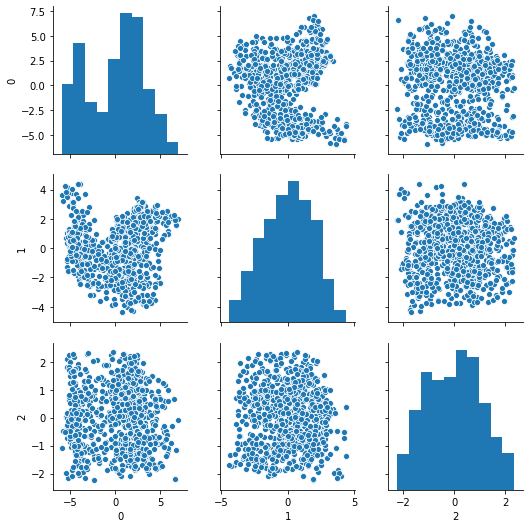

In [40]:
sns.pairplot(pd.DataFrame(Xpca3))

In [41]:
regression_model1 = LinearRegression()
regression_model1.fit(mydata_z, y)
regression_model1.score(mydata_z, y)

1.0

In [42]:
regression_model1_pca = LinearRegression()
regression_model1_pca.fit(Xpca3, y)
regression_model1_pca.score(Xpca3, y)

0.7365241318950152

In [ ]:
# By using PCA, first the dimensions are reduced to 7 variables out of 19 variables. The accuracy score is 83% with minimal
# information loss. Then it is further reduced to 3 variables, for which accuracy score is 73% .